# WeatherPy
----

### Analysis
* Not only is the weather warmer at the Equator (0 Deg. Latitude) as we expected, but you can clearly see that the southern hemisphere is warmer than the northern hemisphere during this season, as we would expect.
* City cloudiness appears to be reported in bands around 20%, 40%, and 80%, suggesting that it is recorded qualitatively by meteorologists, or that the values are binned.
* Wind speed does seem to be related to latitude, with lower wind speeds overall around the Equator. This is due to the weak horizontal pressure gradients in this region.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
# lat_lngs = []
cities = []
country_codes = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])#.city_name
    city_name = city.city_name
    country_code = city.country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city_name)
        country_codes.append(country_code)

# Print the city count to confirm sufficient count
len(cities)

1500

In [13]:
# Create empty dataframe

city_weather_df = pd.DataFrame()
city_weather_df["City"] = cities
city_weather_df["Country Code"] = country_codes
city_weather_df["City_Number"] = ""
city_weather_df["Lat"] = ""
city_weather_df["Lng"] = ""
city_weather_df["Temp_F"] = ""
city_weather_df["Humidity (%)"] = ""
city_weather_df["Cloudiness (%)"] = ""
city_weather_df["Wind Speed (mph)"] = ""
city_weather_df.head()

,City,Country Code,City_Number,Lat,Lng,Temp_F,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hargeysa,so,,,,,,,
1,hermanus,za,,,,,,,
2,codrington,ag,,,,,,,
3,amapa,br,,,,,,,
4,east london,za,,,,,,,


In [14]:
len(city_weather_df["City"])

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [15]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [16]:
# Iterate through the dataframe and make calls to OpenWeather API
# for each city listed in the City column


for index, row in city_weather_df.iterrows():
    city_name = row["City"]
    country_code = row["Country Code"]
    # Assemble url to make requests
    print(f"Processing Index {index}: {city_name}")
    response = requests.get(base_url + "appid=" + api_key + \
                            "&q=" + city_name +"," + country_code + "&units=imperial").json()
    
  #  results = response['results']
    
    try:
        city_weather_df.loc[index, "City_Number"] = response["id"]
        
        city_weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        
        city_weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        
        city_weather_df.loc[index, "Temp_F"] = response["main"]["temp"]
        
        city_weather_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        
        city_weather_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        
        city_weather_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
       
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
print("""
-----------------------
Data Retrieval Complete
-----------------------""")

Processing Index 0: hargeysa
made it this far
Processing Index 1: hermanus
made it this far
Processing Index 2: codrington
City not found. Skipping...
Processing Index 3: amapa
made it this far
Processing Index 4: east london
made it this far
Processing Index 5: port alfred
made it this far
Processing Index 6: tura
made it this far
Processing Index 7: nikolskoye
made it this far
Processing Index 8: vaini
made it this far
Processing Index 9: busselton
made it this far
Processing Index 10: lazaro cardenas
made it this far
Processing Index 11: ilulissat
made it this far
Processing Index 12: nanortalik
made it this far
Processing Index 13: busselton
made it this far
Processing Index 14: klaksvik
made it this far
Processing Index 15: kaitangata
made it this far
Processing Index 16: itapecerica
made it this far
Processing Index 17: nantucket
made it this far
Processing Index 18: evensk
made it this far
Processing Index 19: hermanus
made it this far
Processing Index 20: ruatoria
City not foun

made it this far
Processing Index 167: rikitea
made it this far
Processing Index 168: mataura
City not found. Skipping...
Processing Index 169: busselton
made it this far
Processing Index 170: rikitea
made it this far
Processing Index 171: sibu
made it this far
Processing Index 172: new norfolk
made it this far
Processing Index 173: lompoc
made it this far
Processing Index 174: tabiauea
City not found. Skipping...
Processing Index 175: new norfolk
made it this far
Processing Index 176: skiros
City not found. Skipping...
Processing Index 177: saquarema
made it this far
Processing Index 178: hermanus
made it this far
Processing Index 179: saint george
made it this far
Processing Index 180: kuching
made it this far
Processing Index 181: busselton
made it this far
Processing Index 182: imbituva
made it this far
Processing Index 183: campbell river
made it this far
Processing Index 184: kieta
made it this far
Processing Index 185: touros
made it this far
Processing Index 186: asau
City not 

made it this far
Processing Index 334: castro
made it this far
Processing Index 335: nizhneyansk
City not found. Skipping...
Processing Index 336: ushuaia
made it this far
Processing Index 337: cherskiy
made it this far
Processing Index 338: yeniseysk
made it this far
Processing Index 339: angra
City not found. Skipping...
Processing Index 340: ponta delgada
made it this far
Processing Index 341: viru
made it this far
Processing Index 342: ewa beach
made it this far
Processing Index 343: cidreira
made it this far
Processing Index 344: kodiak
made it this far
Processing Index 345: mataura
City not found. Skipping...
Processing Index 346: carnarvon
made it this far
Processing Index 347: saint george
made it this far
Processing Index 348: louisbourg
City not found. Skipping...
Processing Index 349: cape town
made it this far
Processing Index 350: port elizabeth
made it this far
Processing Index 351: tiksi
made it this far
Processing Index 352: veraval
made it this far
Processing Index 353

made it this far
Processing Index 499: sur
made it this far
Processing Index 500: kapaa
made it this far
Processing Index 501: moerai
made it this far
Processing Index 502: bulgan
made it this far
Processing Index 503: mumford
made it this far
Processing Index 504: ushuaia
made it this far
Processing Index 505: faya
City not found. Skipping...
Processing Index 506: okahandja
made it this far
Processing Index 507: berlevag
made it this far
Processing Index 508: busselton
made it this far
Processing Index 509: sibolga
made it this far
Processing Index 510: punta arenas
made it this far
Processing Index 511: hobart
made it this far
Processing Index 512: ushuaia
made it this far
Processing Index 513: hasaki
made it this far
Processing Index 514: rikitea
made it this far
Processing Index 515: smithers
made it this far
Processing Index 516: constitucion
made it this far
Processing Index 517: hilo
made it this far
Processing Index 518: hermanus
made it this far
Processing Index 519: mar del p

made it this far
Processing Index 664: oktyabrskoye
made it this far
Processing Index 665: saldanha
made it this far
Processing Index 666: hermanus
made it this far
Processing Index 667: belushya guba
City not found. Skipping...
Processing Index 668: kamenskoye
City not found. Skipping...
Processing Index 669: cuxhaven
made it this far
Processing Index 670: mataura
City not found. Skipping...
Processing Index 671: airai
City not found. Skipping...
Processing Index 672: kyra
made it this far
Processing Index 673: bassila
made it this far
Processing Index 674: laguna
City not found. Skipping...
Processing Index 675: bredasdorp
made it this far
Processing Index 676: mys shmidta
City not found. Skipping...
Processing Index 677: kapaa
made it this far
Processing Index 678: vaini
made it this far
Processing Index 679: qaanaaq
made it this far
Processing Index 680: avarua
made it this far
Processing Index 681: hobyo
made it this far
Processing Index 682: thompson
made it this far
Processing I

City not found. Skipping...
Processing Index 828: cape town
made it this far
Processing Index 829: novoagansk
made it this far
Processing Index 830: mataura
City not found. Skipping...
Processing Index 831: ushuaia
made it this far
Processing Index 832: cape town
made it this far
Processing Index 833: anchorage
made it this far
Processing Index 834: falealupo
City not found. Skipping...
Processing Index 835: codrington
City not found. Skipping...
Processing Index 836: jamestown
made it this far
Processing Index 837: belushya guba
City not found. Skipping...
Processing Index 838: beyneu
made it this far
Processing Index 839: busselton
made it this far
Processing Index 840: hermanus
made it this far
Processing Index 841: hambantota
made it this far
Processing Index 842: punta arenas
made it this far
Processing Index 843: longyearbyen
made it this far
Processing Index 844: casablanca
made it this far
Processing Index 845: busselton
made it this far
Processing Index 846: bhubaneswar
made i

made it this far
Processing Index 989: mae ramat
made it this far
Processing Index 990: hilo
made it this far
Processing Index 991: nizhneyansk
City not found. Skipping...
Processing Index 992: evensk
made it this far
Processing Index 993: chuy
made it this far
Processing Index 994: vestmannaeyjar
made it this far
Processing Index 995: albany
made it this far
Processing Index 996: hamilton
made it this far
Processing Index 997: mataura
City not found. Skipping...
Processing Index 998: mataura
City not found. Skipping...
Processing Index 999: lebu
made it this far
Processing Index 1000: podosinovets
made it this far
Processing Index 1001: daye
made it this far
Processing Index 1002: carnarvon
made it this far
Processing Index 1003: kapaa
made it this far
Processing Index 1004: east london
made it this far
Processing Index 1005: hithadhoo
made it this far
Processing Index 1006: ushuaia
made it this far
Processing Index 1007: chagda
City not found. Skipping...
Processing Index 1008: atar


made it this far
Processing Index 1153: dunedin
made it this far
Processing Index 1154: hobart
made it this far
Processing Index 1155: sitka
made it this far
Processing Index 1156: rikitea
made it this far
Processing Index 1157: lasa
City not found. Skipping...
Processing Index 1158: upernavik
made it this far
Processing Index 1159: hithadhoo
made it this far
Processing Index 1160: zhangye
made it this far
Processing Index 1161: semirom
made it this far
Processing Index 1162: taksimo
made it this far
Processing Index 1163: busselton
made it this far
Processing Index 1164: khatanga
made it this far
Processing Index 1165: saldanha
made it this far
Processing Index 1166: san cristobal
made it this far
Processing Index 1167: kaitangata
made it this far
Processing Index 1168: tsabong
made it this far
Processing Index 1169: puerto escondido
made it this far
Processing Index 1170: sao filipe
made it this far
Processing Index 1171: cape town
made it this far
Processing Index 1172: khatanga
mad

City not found. Skipping...
Processing Index 1315: ilulissat
made it this far
Processing Index 1316: codrington
City not found. Skipping...
Processing Index 1317: santa fe
made it this far
Processing Index 1318: cape town
made it this far
Processing Index 1319: puerto princesa
made it this far
Processing Index 1320: tsihombe
City not found. Skipping...
Processing Index 1321: ewa beach
made it this far
Processing Index 1322: vysokaya gora
City not found. Skipping...
Processing Index 1323: hobart
made it this far
Processing Index 1324: cape town
made it this far
Processing Index 1325: hilo
made it this far
Processing Index 1326: ohara
made it this far
Processing Index 1327: tsihombe
City not found. Skipping...
Processing Index 1328: serebryansk
made it this far
Processing Index 1329: barrow
made it this far
Processing Index 1330: butaritari
made it this far
Processing Index 1331: north bend
made it this far
Processing Index 1332: luganville
made it this far
Processing Index 1333: atuona


made it this far
Processing Index 1476: pangai
made it this far
Processing Index 1477: puerto ayora
made it this far
Processing Index 1478: saint-philippe
made it this far
Processing Index 1479: okuchi
made it this far
Processing Index 1480: camacha
made it this far
Processing Index 1481: vaini
made it this far
Processing Index 1482: upernavik
made it this far
Processing Index 1483: rikitea
made it this far
Processing Index 1484: karakendzha
City not found. Skipping...
Processing Index 1485: busselton
made it this far
Processing Index 1486: rikitea
made it this far
Processing Index 1487: fairbanks
made it this far
Processing Index 1488: palmer
made it this far
Processing Index 1489: rikitea
made it this far
Processing Index 1490: acajutla
made it this far
Processing Index 1491: saskylakh
made it this far
Processing Index 1492: portland
made it this far
Processing Index 1493: butaritari
made it this far
Processing Index 1494: leningradskiy
made it this far
Processing Index 1495: hobart


In [25]:
city_weather_df.head()

,City,Country Code,City_Number,Lat,Lng,Temp_F,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hargeysa,so,57289,9.56,44.06,76.49,38,36,6.96
1,hermanus,za,3366880,-34.42,19.24,66.34,79,20,8.99
2,codrington,ag,,NaN,,,,,
3,amapa,br,3401225,-1.83,-56.23,93.95,52,20,4.05
4,east london,za,1006984,-33.02,27.91,60.8,93,40,3.36


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_weather_df.count()

City                1500
Country Code        1500
City_Number         1500
Lat                 1500
Lng                 1500
Temp_F              1500
Humidity (%)        1500
Cloudiness (%)      1500
Wind Speed (mph)    1500
dtype: int64

In [20]:
city_weather_df.dtypes

City                object
Country Code        object
City_Number         object
Lat                 object
Lng                 object
Temp_F              object
Humidity (%)        object
Cloudiness (%)      object
Wind Speed (mph)    object
dtype: object

In [26]:
# Convert data types to numeric where appropriate

city_weather_df["Lat"] = pd.to_numeric(city_weather_df["Lat"])
city_weather_df["Lng"] = pd.to_numeric(city_weather_df["Lng"])
city_weather_df["Temp_F"] = pd.to_numeric(city_weather_df["Temp_F"])
city_weather_df["Humidity (%)"] = pd.to_numeric(city_weather_df["Humidity (%)"])
city_weather_df["Cloudiness (%)"] = pd.to_numeric(city_weather_df["Cloudiness (%)"])
city_weather_df["Wind Speed (mph)"] = pd.to_numeric(city_weather_df["Wind Speed (mph)"])
city_weather_df.dtypes

City                 object
Country Code         object
City_Number          object
Lat                 float64
Lng                 float64
Temp_F              float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [28]:
# Export to .csv file

city_weather_df.to_csv(output_data_file, sep = ",")

In [30]:
# Bring it back in

weather_py_df = pd.read_csv(output_data_file)

weather_py_df.head()

,Unnamed: 0,City,Country Code,City_Number,Lat,Lng,Temp_F,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,0,hargeysa,so,57289.0,9.56,44.06,76.49,38.0,36.0,6.96
1,1,hermanus,za,3366880.0,-34.42,19.24,66.34,79.0,20.0,8.99
2,2,codrington,ag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,amapa,br,3401225.0,-1.83,-56.23,93.95,52.0,20.0,4.05
4,4,east london,za,1006984.0,-33.02,27.91,60.80,93.0,40.0,3.36


In [31]:
weather_py_df.dtypes

Unnamed: 0            int64
City                 object
Country Code         object
City_Number         float64
Lat                 float64
Lng                 float64
Temp_F              float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [34]:
# Need to drop all rows with NAs

weather_py_df = weather_py_df.dropna(how="any")
weather_py_df.count()

Unnamed: 0          1295
City                1295
Country Code        1295
City_Number         1295
Lat                 1295
Lng                 1295
Temp_F              1295
Humidity (%)        1295
Cloudiness (%)      1295
Wind Speed (mph)    1295
dtype: int64

In [35]:
weather_py_df.head(10)

,Unnamed: 0,City,Country Code,City_Number,Lat,Lng,Temp_F,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,0,hargeysa,so,57289.0,9.56,44.06,76.49,38.0,36.0,6.96
1,1,hermanus,za,3366880.0,-34.42,19.24,66.34,79.0,20.0,8.99
3,3,amapa,br,3401225.0,-1.83,-56.23,93.95,52.0,20.0,4.05
4,4,east london,za,1006984.0,-33.02,27.91,60.80,93.0,40.0,3.36
5,5,port alfred,za,964432.0,-33.59,26.89,64.00,84.0,48.0,5.99
6,6,tura,ru,2014833.0,64.27,100.22,23.75,74.0,88.0,2.48
7,7,nikolskoye,ru,546105.0,59.70,30.79,35.51,55.0,0.0,4.47
8,8,vaini,to,4032243.0,-21.20,-175.20,75.20,83.0,20.0,8.05
9,9,busselton,au,2075265.0,-33.64,115.35,58.24,44.0,0.0,22.28
10,10,lazaro cardenas,mx,3996234.0,28.39,-105.62,75.00,16.0,32.0,8.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

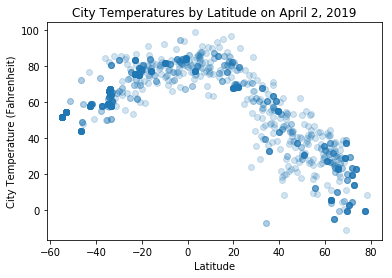

<Figure size 432x288 with 0 Axes>

In [47]:
# Data used for analysis was saved on 4/02/2019

# x_axis = np.arange(-90, 90, 10)

plt.scatter(weather_py_df["Lat"], weather_py_df["Temp_F"], alpha = 0.2)

plt.ylabel("City Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.title("City Temperatures by Latitude on April 2, 2019")
plt.show()

plt.savefig("output_data/temp_lat.png")

#### Latitude vs. Humidity Plot

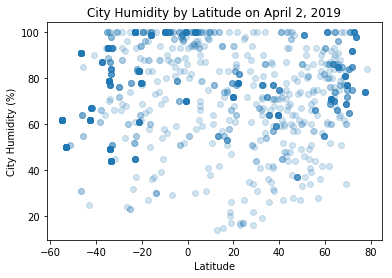

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(weather_py_df["Lat"], weather_py_df["Humidity (%)"], alpha = 0.2)

plt.ylabel("City Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Humidity by Latitude on April 2, 2019")
plt.show()
plt.savefig("output_data/hum_lat.png")
# All pretty high humidity, possibly because large cities tend to be
# near large bodies of water

#### Latitude vs. Cloudiness Plot

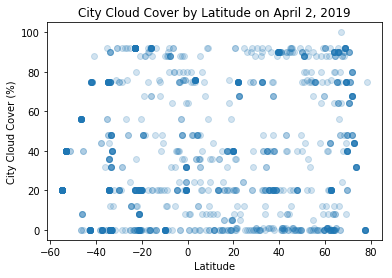

<Figure size 432x288 with 0 Axes>

In [49]:
plt.scatter(weather_py_df["Lat"], weather_py_df["Cloudiness (%)"], alpha = 0.2)

plt.ylabel("City Cloud Cover (%)")
plt.xlabel("Latitude")
plt.title("City Cloud Cover by Latitude on April 2, 2019")
plt.show()
plt.savefig("output_data/cloud_lat.png")
# Note the distinct bands around multiples of 10 for the y axis
# This suggests that the % humidity was reported qualitatively

#### Latitude vs. Wind Speed Plot

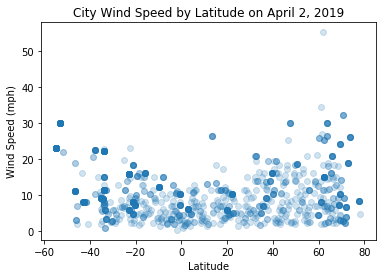

<Figure size 432x288 with 0 Axes>

In [50]:
plt.scatter(weather_py_df["Lat"], weather_py_df["Wind Speed (mph)"], alpha = 0.2)

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Wind Speed by Latitude on April 2, 2019")
plt.show()
plt.savefig("output_data/wind_lat.png")